In [10]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset
import torchvision.transforms as transforms
from torchvision.transforms import v2

from PIL import Image
from tqdm import tqdm
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

In [17]:
# 첫 10개의 학습 데이터 이름과 label 출력
import pandas as pd
train_df = pd.read_csv("data/train_data.csv")

In [22]:
labels = np.array(train_df['label'])
class_count = [0] * 10
for i in range(10):
    class_count[i] = (labels == i).sum()

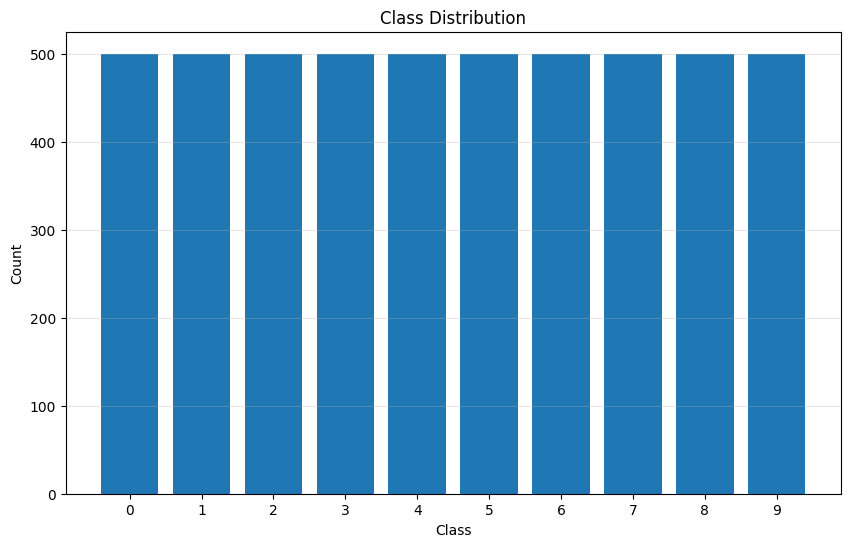

In [24]:
plt.figure(figsize=(10, 6))
plt.bar(range(10), class_count)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(range(10))
plt.grid(axis='y', alpha=0.3)
plt.show()

In [2]:
# 데이터셋 디렉토리 위치 지정
data_path = "./data"

In [3]:
from glob import glob

# 커스텀 데이터셋 클래스
class MyDataset(Dataset):
    def __init__(self, data_path, transform=None, train=True):
        self.train = train
        train_df = pd.read_csv(f"{data_path}/train_data.csv")

        self.name2label = dict(zip(train_df["name"], train_df["label"]))

        if self.train:
            self.img_path = glob(f"{data_path}/train_data/*.png")
            self.labels =  [self.name2label[d.split("/")[-1]] for d in self.img_path]
        else:
            self.img_path = glob(f"{data_path}/test_data/*.png")

        self.transform = transform

    def __len__(self):
        return len(self.img_path)   

    def __getitem__(self, index):
        img = Image.open(self.img_path[index])
        if img.mode != 'RGB':
            img = img.convert('RGB')

        if self.transform:
            img = self.transform(img)

        if self.train:
            return img, self.labels[index]
        else:
            return img, self.img_path[index].split("/")[-1]

In [4]:
raw_dataset = MyDataset(data_path)

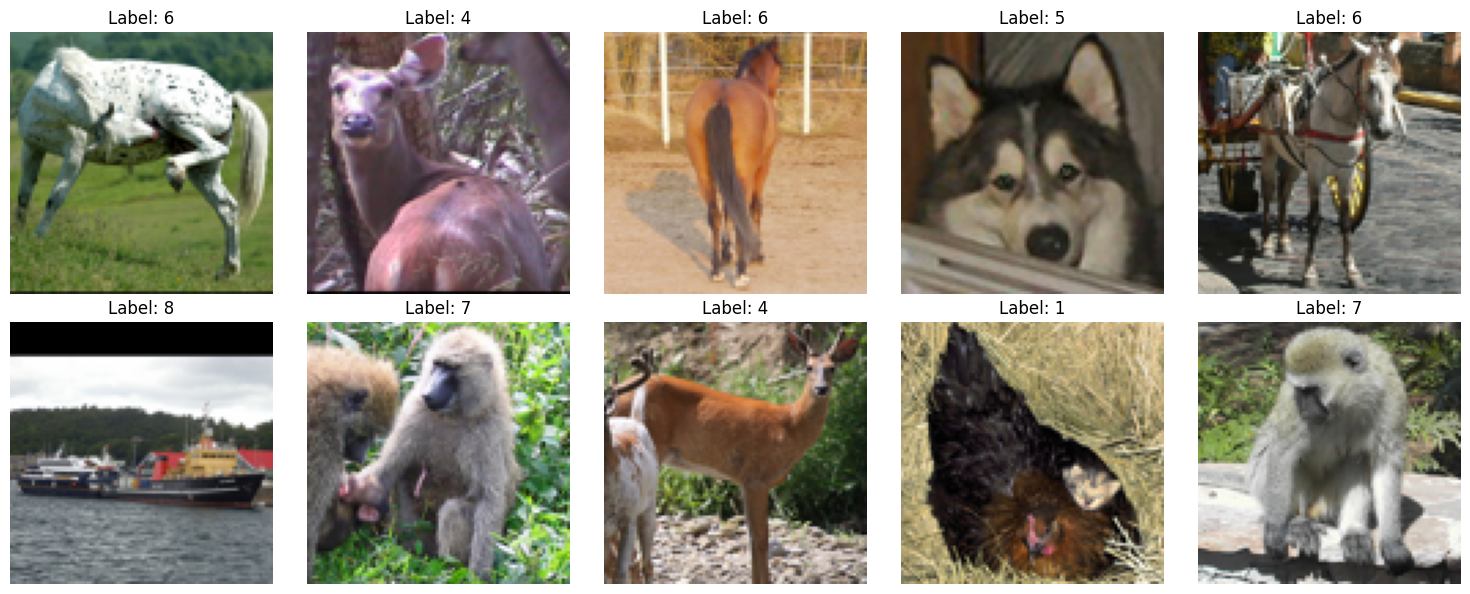

In [16]:
def visualize_dataset(dataset, num_samples=10):
    fig = plt.figure(figsize=(15, 6))
    
    # 랜덤하게 인덱스 선택
    indices = np.random.choice(len(dataset), num_samples, replace=False)
    
    for i, idx in enumerate(indices):
        img, label = dataset[idx]
        
        # Tensor -> Image 변환 (시각화를 위해)
        # (C, H, W) -> (H, W, C)
        # img = img.permute(1, 2, 0).numpy()
        
        ax = fig.add_subplot(2, 5, i + 1)
        ax.imshow(img)
        ax.set_title(f"Label: {label}")
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# 실행
visualize_dataset(raw_dataset)

In [5]:
raw_dataset[0]

(<PIL.PngImagePlugin.PngImageFile image mode=RGB size=96x96>, 1)

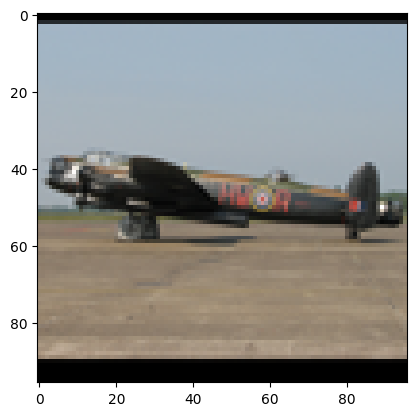

In [13]:
for img, label in raw_dataset:
    if label == 0:
        plt.imshow(img)
        plt.show()
        break

In [11]:
np.array(raw_dataset[0][0]).shape

(96, 96, 3)

In [8]:
len(raw_dataset)

5000

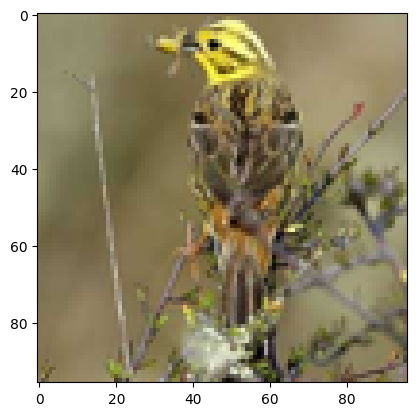

In [7]:
plt.imshow(raw_dataset[0][0])
plt.show()